# Observations:


- Total Number of Measurements per Drug Regimen: Capomulin and Ramicane both have the most number of measurments taken during the drug trial.


In [1]:
#%matplotlib notebook

In [2]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import sem
from scipy.stats import linregress

In [3]:
# Read in files to two DataFrames
mouse_df = pd.read_csv("../Resources/Mouse_metadata.csv", encoding="utf8")
results_df = pd.read_csv("../Resources/Study_results.csv", encoding="utf8")

In [4]:
# View mouse file
print(f"There are {len(mouse_df)} rows.")
mouse_df.head()

There are 249 rows.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
# View results file
print(f"There are {len(results_df):1,} rows.")
results_df.head()

There are 1,893 rows.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Check for duplicate timepoints with a single mouse ID and create a new column
results_df["Duplicate"] = results_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)

# Remove duplicates
results_reduced_df = results_df.loc[results_df["Duplicate"] == False, ["Mouse ID", "Timepoint", "Tumor Volume (mm3)",
                                                                      "Metastatic Sites"]]
# Print output
print(f"There were {len(results_df) - len(results_reduced_df)} duplicate rows.")
print(f"After removing the duplicates, there are now {len(results_reduced_df):1,} rows.")

There were 10 duplicate rows.
After removing the duplicates, there are now 1,883 rows.


In [7]:
# Identify duplicates (if want to see)
duplicate = results_df.loc[results_df["Duplicate"] == True, ["Mouse ID", "Timepoint", "Tumor Volume (mm3)","Metastatic Sites"]]
duplicate = duplicate.reset_index()
#duplicate

print(f"These timepoints were duplicated:")
print([duplicate["Timepoint"][row] for row in range(len(duplicate))])
print(f"With this Mouse ID:")
print([duplicate["Mouse ID"][row] for row in range(len(duplicate))])

These timepoints were duplicated:
[0, 0, 5, 5, 10, 10, 15, 15, 20, 20]
With this Mouse ID:
['g989', 'g989', 'g989', 'g989', 'g989', 'g989', 'g989', 'g989', 'g989', 'g989']


In [8]:
# Merge DataFrames 
merged_df = pd.merge(mouse_df, results_reduced_df, on="Mouse ID")
print(f"There are {len(merged_df):1,} rows.")
merged_df.head()

There are 1,883 rows.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Create new csv for merged data: to check merge was correct
#merged_df.to_csv("merged_df.csv", header=True)

In [10]:
# Calculate mean of volume
mean_volume_df = merged_df.groupby("Drug Regimen").mean()

# Reset the index
mean_volume_df = mean_volume_df.reset_index()
# Remove other columns
mean_volume_df = mean_volume_df[["Drug Regimen", "Tumor Volume (mm3)"]]
# Rename column
mean_volume_df = mean_volume_df.rename(columns={"Tumor Volume (mm3)": "Mean"})

#mean_volume_df

In [11]:
# Calculate the median of the volume
median_volume_df = merged_df.groupby("Drug Regimen").median()

# Reset the index
median_volume_df = median_volume_df.reset_index()
# Remove other columns
median_volume_df = median_volume_df[["Drug Regimen", "Tumor Volume (mm3)"]]
# Rename column
median_volume_df = median_volume_df.rename(columns={"Tumor Volume (mm3)": "Median"})

#median_volume_df

In [12]:
# Calculate the variance of the volume
variance_volume_df = merged_df.groupby("Drug Regimen").var()

# Reset the index
variance_volume_df = variance_volume_df.reset_index()
# Remove other columns
variance_volume_df = variance_volume_df[["Drug Regimen", "Tumor Volume (mm3)"]]
# Rename column
variance_volume_df = variance_volume_df.rename(columns={"Tumor Volume (mm3)": "Variance"})

#variance_volume_df

In [13]:
# Calculate Standard Deviation
sd_volume_df = merged_df.groupby("Drug Regimen").std()

# Reset the index
sd_volume_df = sd_volume_df.reset_index()
# Remove other columns
sd_volume_df = sd_volume_df[["Drug Regimen", "Tumor Volume (mm3)"]]
# Rename column
sd_volume_df = sd_volume_df.rename(columns={"Tumor Volume (mm3)": "Standard Deviation"})

#sd_volume_df

In [14]:
# Calculate Standard Error of the Mean
sem_volume_df = merged_df.groupby("Drug Regimen").sem()

# Reset the index
sem_volume_df = sem_volume_df.reset_index()
# Remove other columns
sem_volume_df = sem_volume_df[["Drug Regimen", "Tumor Volume (mm3)"]]
# Rename column
sem_volume_df = sem_volume_df.rename(columns={"Tumor Volume (mm3)": "Standard Error of the Mean"})

#sem_volume_df

In [15]:
# Merge tables on drug regimen (mean & median)
mean_median = pd.merge(mean_volume_df, median_volume_df, on="Drug Regimen")
#mean_median

In [16]:
# Merge tables on drug regimen (variance & standard deviation)
variance_sd = pd.merge(variance_volume_df, sd_volume_df, on="Drug Regimen")
#variance_sd

In [17]:
# Merge tables on drug regimen (missing SEM)
summary_stats_0 = pd.merge(mean_median, variance_sd, on="Drug Regimen")
#summary_stats_0

# Summary Statistics of Tumor Volumes:

In [18]:
# Merge tables on drug regimen (all stats)
summary_stats_df = pd.merge(summary_stats_0, sem_volume_df, on="Drug Regimen")
summary_stats_df

,Drug Regimen,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [19]:
# Aggregation Method: Summary Stats for Overall
summary_stats_df.agg(func="mean")

Mean                          50.989715
Median                        49.942960
Variance                      47.878604
Standard Deviation             6.822623
Standard Error of the Mean     0.502366
dtype: float64

In [20]:
# Create drug regimen dataframe 
drug_reg_df = merged_df[["Mouse ID", "Drug Regimen"]]

In [21]:
# Create a groupby for the total number of measurements taken per regimen
drug_reg_groupby = drug_reg_df.groupby("Drug Regimen").count()
# Reset Index
drug_reg_groupby = drug_reg_groupby.reset_index()
drug_reg_groupby = drug_reg_groupby.rename(columns={"Mouse ID": "Total Measurements"})

drug_reg_groupby

,Drug Regimen,Total Measurements
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,151
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


In [22]:
# Create lists and append to lists
measurements = []
labels = []

for x in drug_reg_groupby["Total Measurements"]:
    measurements.append(x)
for x in drug_reg_groupby["Drug Regimen"]:
    labels.append(x)

# Bar Charts: 
### Total Number of Measurements per Drug Regimen:

## PyPlot

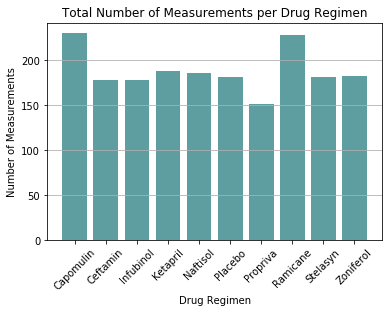

In [23]:
# PyPlot Bar Chart
plt.bar(labels, measurements, align="center", width=0.80, color="cadetblue")

tick_locations = [value for value in range(len(labels))]
plt.xticks(ticks=tick_locations, labels=labels, rotation=45)
plt.title("Total Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.grid(axis='y')
plt.ylim=[0,(max(measurements)+10)]

plt.show()

## Pandas

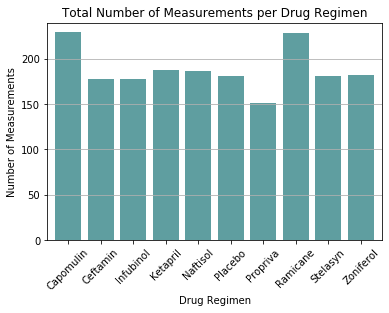

In [24]:
# Pandas Bar Chart
drug_reg_groupby.plot(kind='bar', legend=False, title="Total Number of Measurements per Drug Regimen",
                        rot='45', ylim=[0,max(measurements)+10], width=0.80, color="cadetblue", align="center")

tick_locations = [value for value in range(len(labels))]
plt.xticks(ticks=tick_locations, labels=labels)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.grid(axis='y')

plt.show()

In [25]:
# Create gender dataframe
gender_df = merged_df[["Mouse ID", "Sex"]]

In [26]:
# Create groupby dataframe for pie plots
gender_groupby = gender_df.groupby("Sex").count()
# Reset index
gender_groupby = gender_groupby.reset_index()
gender_groupby.head()

,Sex,Mouse ID
0,Female,925
1,Male,958


# Pie Charts:
### Gender Breakdown of Mice:

## PyPlot

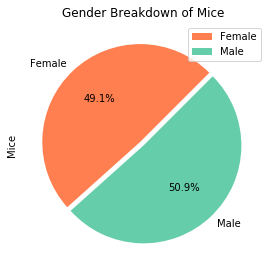

In [27]:
# PyPlot Pie chart
colors = ["coral", "mediumaquamarine"]
labels = ["Female", "Male"]
sizes = []
explode = [0.05, 0]

# Append numbers to sizes
for x in gender_groupby["Mouse ID"]:
    sizes.append(x)

fig1, ax1 = plt.subplots(figsize=(4.5,4.5))
plt.pie(sizes, colors=colors, labels=labels, explode=explode, startangle=45, autopct="%1.1f%%")
plt.title("Gender Breakdown of Mice")
plt.ylabel("Mice")
plt.legend(loc="best")
plt.show()

## Pandas

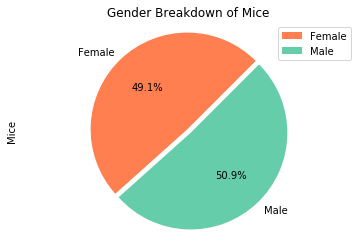

In [28]:
# Pandas Pie chart
colors = ["coral", "mediumaquamarine"]
gender_pie = gender_groupby.plot(kind="pie", y="Mouse ID", labels=gender_groupby["Sex"], startangle=45, 
                                 autopct="%1.1f%%", colors=colors, title="Gender Breakdown of Mice", explode=[0.05,0])
gender_pie.set_ylabel("Mice")
plt.axis("equal")
plt.show()

## 4 Most Promising Treatment Regimens:

### - Capomulin
### - Ramicane
### - Infubinol
### - Ceftamin

In [29]:
# Find 4 promising regimens and isolate into a dataframe
promising_regimens = merged_df.loc[(merged_df["Drug Regimen"] == "Capomulin") | (merged_df["Drug Regimen"] == "Ramicane") |
                                   (merged_df["Drug Regimen"] == "Infubinol") | (merged_df["Drug Regimen"] == "Ceftamin"), :]
# Reset the index
promising_regimens = promising_regimens.reset_index(drop=True)

# Remove other columns
promising_regimens = promising_regimens[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)", "Timepoint", "Weight (g)"]]

promising_regimens

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint,Weight (g)
0,k403,Ramicane,45.000000,0,16
1,k403,Ramicane,38.825898,5,16
2,k403,Ramicane,35.014271,10,16
3,k403,Ramicane,34.223992,15,16
4,k403,Ramicane,32.997729,20,16
...,...,...,...,...,...
809,z581,Infubinol,54.316407,25,25
810,z581,Infubinol,56.286750,30,25
811,z581,Infubinol,58.628399,35,25
812,z581,Infubinol,60.053740,40,25


In [62]:
# GroupBy mouse ID to find alternate max time points
mouse_groupby = promising_regimens.groupby("Mouse ID").max()
# Reset index
mouse_groupby = mouse_groupby.reset_index()
mouse_groupby = mouse_groupby[["Mouse ID", "Timepoint"]]
mouse_groupby

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [79]:
# Merge & get the tumor volume for the final timepoint
merged_mice = pd.merge(mouse_groupby, promising_regimens, on=["Mouse ID", "Timepoint"])
merged_mice

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3),Weight (g)
0,a203,45,Infubinol,67.973419,23
1,a251,45,Infubinol,65.525743,25
2,a275,45,Ceftamin,62.999356,28
3,a411,45,Ramicane,38.407618,22
4,a444,45,Ramicane,43.047543,25
...,...,...,...,...,...
95,y769,45,Ceftamin,68.594745,27
96,y793,45,Capomulin,31.896238,17
97,y865,45,Ceftamin,64.729837,26
98,z578,45,Ramicane,30.638696,16


In [103]:
# Create a list of treatments
treatment = []
for x in range(len(merged_mice["Drug Regimen"])):
    treatment.append(merged_mice["Drug Regimen"][x])

# Create a list for tumor volume data
tumor_vol_data = []
for x in range(len(merged_mice)):
    tumor_vol_data.append(merged_mice["Tumor Volume (mm3)"][x])

In [80]:
# Isolate the final timepoint & Capomulin drug
capomulin = merged_mice.loc[(merged_mice["Drug Regimen"] == "Capomulin"),:]

# Reset index
capomulin = capomulin.reset_index(drop=True)

# Create series for volume
capomulin_vol = capomulin["Tumor Volume (mm3)"]
#capomulin.count()

In [81]:
# Isolate the final timepoint & ramicane drug
ramicane = merged_mice.loc[(merged_mice["Drug Regimen"] == "Ramicane"),:]

# Reset index
ramicane = ramicane.reset_index(drop=True)

# Create series for volume
ramicane_vol = ramicane["Tumor Volume (mm3)"]
#ramicane.count()

In [83]:
# Isolate the final timepoint & infubinol drug
infubinol = merged_mice.loc[(merged_mice["Drug Regimen"] == "Infubinol"),:]

# Reset index
infubinol = infubinol.reset_index(drop=True)

# Create series for volume
infubinol_vol = infubinol["Tumor Volume (mm3)"]
#infubinol.count()

In [84]:
# Isolate the final timepoint & ceftamin drug
ceftamin = merged_mice.loc[(merged_mice["Drug Regimen"] == "Ceftamin"),:]

# Reset index
ceftamin = ceftamin.reset_index(drop=True)

# Create series for volume
ceftamin_vol = ceftamin["Tumor Volume (mm3)"]
#ceftamin.count()

In [112]:
# Create quartiles & IQR: Capomulin
quartiles_cap = capomulin_vol.quantile([.25,.5,.75])
lowerq_cap = quartiles_cap[.25]
upperq_cap = quartiles_cap[.75]
iqr_cap = upperq_cap-lowerq_cap

# Print out results
print(f"The lower quartile for Capomulin is {lowerq_cap:1.2f}.")
print(f"The upper quartile for Capomulin is {upperq_cap:1.2f}.")
print(f"The interquartile range is {iqr_cap:1.2f}.")

# Find upper and lower bounds and print out results
lowerbound = lowerq_cap - (1.5*iqr_cap)
upperbound = upperq_cap + (1.5*iqr_cap)
print(f"Potential Outliers: values below {lowerbound:1.2f} and above {upperbound:1.2f}")
print(f"Min: {min(capomulin_vol):1.2f}")
print(f"Max: {max(capomulin_vol):1.2f}")

# Quantitatively Determine if there are outliers
if min(capomulin_vol) < lowerbound:
    print(" There is a potential outlier below the lower bound.")
elif max(capomulin_vol) > upperbound:
    print(" There is a potential outlier above the upper bound.")
else:
    print(" No outliers found.")

The lower quartile for Capomulin is 32.38.
The upper quartile for Capomulin is 40.16.
The interquartile range is 7.78.
Potential Outliers: values below 20.70 and above 51.83
Min: 23.34
Max: 47.69
 No outliers found.


In [115]:
# Create quartiles & IQR: ramicane
quartiles_ram = ramicane_vol.quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[.25]
upperq_ram = quartiles_ram[.75]
iqr_ram = upperq_ram-lowerq_ram

# Print out results
print(f"The lower quartile for Ramicane is {lowerq_ram:1.2f}.")
print(f"The upper quartile for Ramicane is {upperq_ram:1.2f}.")
print(f"The interquartile range is {iqr_ram:1.2f}.")

# Find upper and lower bounds and print out results
lowerbound = lowerq_ram - (1.5*iqr_ram)
upperbound = upperq_ram + (1.5*iqr_ram)
print(f"Potential Outliers: values below {lowerbound:1.2f} and above {upperbound:1.2f}")
print(f"Min: {min(ramicane_vol):1.2f}")
print(f"Max: {max(ramicane_vol):1.2f}")

# Quantitatively Determine if there are outliers
if min(ramicane_vol) < lowerbound:
    print(" There is a potential outlier below the lower bound.")
elif max(ramicane_vol) > upperbound:
    print(" There is a potential outlier above the upper bound.")
else:
    print(" No outliers found.")

The lower quartile for Ramicane is 31.56.
The upper quartile for Ramicane is 40.66.
The interquartile range is 9.10.
Potential Outliers: values below 17.91 and above 54.31
Min: 22.05
Max: 45.22
 No outliers found.


In [113]:
# Create quartiles & IQR: infubinol
quartiles_inf = infubinol_vol.quantile([.25,.5,.75])
lowerq_inf = quartiles_inf[.25]
upperq_inf = quartiles_inf[.75]
iqr_inf = upperq_inf-lowerq_inf

# Print out results
print(f"The lower quartile for Infubinol is {lowerq_inf:1.2f}.")
print(f"The upper quartile for Infubinol is {upperq_inf:1.2f}.")
print(f"The interquartile range is {iqr_inf:1.2f}.")

lowerbound = lowerq_inf - (1.5*iqr_inf)
upperbound = upperq_inf + (1.5*iqr_inf)
print(f"Potential Outliers: values below {lowerbound:1.2f} and above {upperbound:1.2f}")
print(f"Min: {min(infubinol_vol):1.2f}")
print(f"Max: {max(infubinol_vol):1.2f}")

# Quantitatively Determine if there are outliers
if min(infubinol_vol) < lowerbound:
    print(" There is a potential outlier below the lower bound.")
elif max(infubinol_vol) > upperbound:
    print(" There is a potential outlier above the upper bound.")
else:
    print(" No outliers found.")

The lower quartile for Infubinol is 54.05.
The upper quartile for Infubinol is 65.53.
The interquartile range is 11.48.
Potential Outliers: values below 36.83 and above 82.74
Min: 36.32
Max: 72.23
 There is a potential outlier below the lower bound.


In [114]:
# Create quartiles & IQR: ceftamin
quartiles_ceft = ceftamin_vol.quantile([.25,.5,.75])
lowerq_ceft = quartiles_ceft[.25]
upperq_ceft = quartiles_ceft[.75]
iqr_ceft = upperq_ceft-lowerq_ceft

# Print out results
print(f"The lower quartile for Ceftamin is {lowerq_ceft:1.2f}.")
print(f"The upper quartile for Ceftamin is {upperq_ceft:1.2f}.")
print(f"The interquartile range is {iqr_ceft:1.2f}.")

# Find upper and lower bounds and print out results
lowerbound = lowerq_ceft - (1.5*iqr_ceft)
upperbound = upperq_ceft + (1.5*iqr_ceft)
print(f"Potential Outliers: values below {lowerbound:1.2f} and above {upperbound:1.2f}")
print(f"Min: {min(ceftamin_vol):1.2f}")
print(f"Max: {max(ceftamin_vol):1.2f}")      

# Quantitatively Determine if there are outliers
if min(ceftamin_vol) < lowerbound:
    print(" There is a potential outlier below the lower bound.")
elif max(ceftamin_vol) > upperbound:
    print(" There is a potential outlier above the upper bound.")
else:
    print(" No outliers found.")

The lower quartile for Ceftamin is 48.72.
The upper quartile for Ceftamin is 64.30.
The interquartile range is 15.58.
Potential Outliers: values below 25.36 and above 87.67
Min: 45.00
Max: 68.92
 No outliers found.


## Capomulin

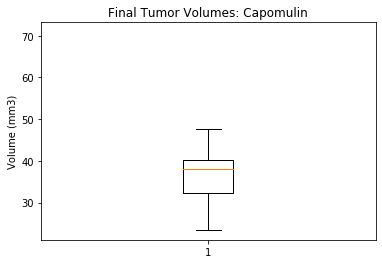

In [90]:
# Create boxplot using matplotlib: Capomulin
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volumes: Capomulin")
ax1.set_ylabel("Volume (mm3)")
green_circle = dict(markerfacecolor='g', marker="o")
ax1.boxplot(capomulin_vol, flierprops=green_circle)
ax1.set_ylim(min(merged_mice["Tumor Volume (mm3)"])-1, max(merged_mice["Tumor Volume (mm3)"])+1)
plt.show()

## Ramicane

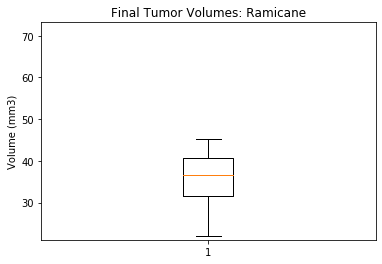

In [91]:
# Create boxplot using matplotlib: Ramicane
fig2, ax2 = plt.subplots()
ax2.set_title("Final Tumor Volumes: Ramicane")
ax2.set_ylabel("Volume (mm3)")
green_circle = dict(markerfacecolor='g', marker="o")
ax2.boxplot(ramicane_vol, flierprops=green_circle)
ax2.set_ylim(min(merged_mice["Tumor Volume (mm3)"])-1, max(merged_mice["Tumor Volume (mm3)"])+1)
plt.show()

## Infubinol

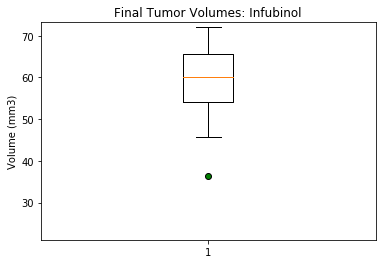

In [92]:
# Create boxplot using matplotlib: Infubinol
fig3, ax3 = plt.subplots()
ax3.set_title("Final Tumor Volumes: Infubinol")
ax3.set_ylabel("Volume (mm3)")
green_circle = dict(markerfacecolor='g', marker="o")
ax3.boxplot(infubinol_vol, flierprops=green_circle)
ax3.set_ylim(min(merged_mice["Tumor Volume (mm3)"])-1, max(merged_mice["Tumor Volume (mm3)"])+1)
plt.show()

## Ceftamin

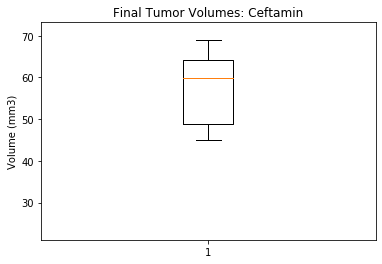

In [93]:
# Create boxplot using matplotlib: Ceftamin
fig4, ax4 = plt.subplots()
ax4.set_title("Final Tumor Volumes: Ceftamin")
ax4.set_ylabel("Volume (mm3)")
green_circle = dict(markerfacecolor='g', marker="o")
ax4.boxplot(ceftamin_vol, flierprops=green_circle)
ax4.set_ylim(min(merged_mice["Tumor Volume (mm3)"])-1, max(merged_mice["Tumor Volume (mm3)"])+1)
plt.show()

In [43]:
# Collect all mice from capomulin
capomulin_mice = promising_regimens.loc[(promising_regimens["Drug Regimen"] == "Capomulin"),:]
# Reset the index
capomulin_mice = capomulin_mice.reset_index(drop=True)

# Select one mouse with Capomulin treatment
capomulin_single_mouse = capomulin_mice.loc[capomulin_mice["Mouse ID"] == "s185",:]
# Reset the index
capomulin_single_mouse = capomulin_single_mouse.reset_index(drop=True)
# Create axes for line graph
x_axis = capomulin_single_mouse["Tumor Volume (mm3)"]
y_axis = capomulin_single_mouse["Timepoint"]

## Mouse "s185": Tumor Volume over Time on Capomulin

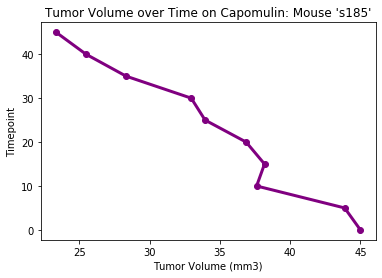

In [44]:
plt.plot(x_axis, y_axis, linewidth=3, marker="o", color="purple")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")
plt.title("Tumor Volume over Time on Capomulin: Mouse 's185'")
plt.show()

## Tumor Volume vs. Mouse Weight for Capomulin:

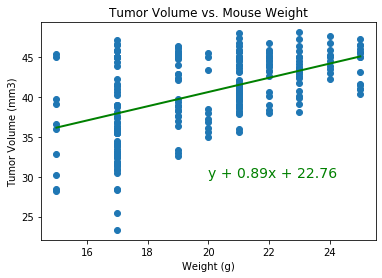

In [45]:
# Define axes for scatter plot
weight = capomulin_mice["Weight (g)"]
tumor_volume = capomulin_mice["Tumor Volume (mm3)"]

# Create scatter plot & labels & title
plt.scatter(weight, tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs. Mouse Weight")

avg_tumor_groupby = capomulin_mice.groupby("Weight (g)").mean()
avg_tumor_volume = avg_tumor_groupby["Tumor Volume (mm3)"]
avg_tumor_groupby = avg_tumor_groupby.reset_index()
groupby_weight = avg_tumor_groupby["Weight (g)"]

# Create linear regression model & equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(groupby_weight, avg_tumor_volume)
regress_values = groupby_weight * slope + intercept
line_equation = f"y + {round(slope,2)}x + {round(intercept,2)}"
plt.plot(groupby_weight, regress_values, "g-", linewidth= 2)
plt.annotate(line_equation, (20,30), fontsize=14, color="green")
#plt.figure(figsize=(25,25))
plt.show()

## Correlation Coefficient:

In [46]:
# Define correlation and find it
correlation = sts.pearsonr(groupby_weight, avg_tumor_volume)
print(f"The correlation coefficient is {correlation[0]:1.2f}")

The correlation coefficient is 0.95
